In [1]:
# Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# RiotWatcher
from riotwatcher import LolWatcher, ApiError

# Cassiopeia
import cassiopeia as cass

In [7]:
# Global Variables
api_key = 'RGAPI-58ae9294-b79b-411e-847c-33607bb2e033'
watcher = LolWatcher(api_key)
region = 'na1'

In [8]:
# Champion dictionary
latest_champ_version = watcher.data_dragon.versions_for_region(region)['n']['champion']

static_champ_list = watcher.data_dragon.champions(version=latest_champ_version, full=False, locale='en_US')

# Create dictionary
champ_dict = {}

# Populate dictionary
for i in static_champ_list['data']:
    current_champ = static_champ_list['data'][i]
    champ_dict[current_champ['key']] = current_champ['id']

print(champ_dict)

{'266': 'Aatrox', '103': 'Ahri', '84': 'Akali', '166': 'Akshan', '12': 'Alistar', '32': 'Amumu', '34': 'Anivia', '1': 'Annie', '523': 'Aphelios', '22': 'Ashe', '136': 'AurelionSol', '268': 'Azir', '432': 'Bard', '200': 'Belveth', '53': 'Blitzcrank', '63': 'Brand', '201': 'Braum', '51': 'Caitlyn', '164': 'Camille', '69': 'Cassiopeia', '31': 'Chogath', '42': 'Corki', '122': 'Darius', '131': 'Diana', '119': 'Draven', '36': 'DrMundo', '245': 'Ekko', '60': 'Elise', '28': 'Evelynn', '81': 'Ezreal', '9': 'Fiddlesticks', '114': 'Fiora', '105': 'Fizz', '3': 'Galio', '41': 'Gangplank', '86': 'Garen', '150': 'Gnar', '79': 'Gragas', '104': 'Graves', '887': 'Gwen', '120': 'Hecarim', '74': 'Heimerdinger', '420': 'Illaoi', '39': 'Irelia', '427': 'Ivern', '40': 'Janna', '59': 'JarvanIV', '24': 'Jax', '126': 'Jayce', '202': 'Jhin', '222': 'Jinx', '145': 'Kaisa', '429': 'Kalista', '43': 'Karma', '30': 'Karthus', '38': 'Kassadin', '55': 'Katarina', '10': 'Kayle', '141': 'Kayn', '85': 'Kennen', '121': 'Kh

In [13]:
# Get my account
account = watcher.summoner.by_name(region, 'Jedı07')
puuid = account['puuid']
print(account)

{'id': 'aEifhkhWbrULdXrAMeujh2QWBJYUI6SiFfvYv0-45czGlSY', 'accountId': 'pIK8pwc2yN_1aG2EzAnyf1LWIZ0DRtIMSS9fgsbRkYk-FV8', 'puuid': 'Xe6zTTwF0SriSHnDNTCRhfaabQlfod6158R135BCqD8IYT55sC96AuLbPswRdLAb4Oh0MvkshQoQdg', 'name': 'Jedı07', 'profileIconId': 5147, 'revisionDate': 1661811195000, 'summonerLevel': 177}


In [10]:
# Ranked stats
ranked_stats = watcher.league.by_summoner(region, account['id'])
print(ranked_stats)

[{'leagueId': '705380b9-1023-4a57-94fd-e660ec0c96aa', 'queueType': 'RANKED_SOLO_5x5', 'tier': 'SILVER', 'rank': 'I', 'summonerId': 'aEifhkhWbrULdXrAMeujh2QWBJYUI6SiFfvYv0-45czGlSY', 'summonerName': 'Jedı07', 'leaguePoints': 4, 'wins': 20, 'losses': 19, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': False}, {'leagueId': '1058479c-6f0b-4708-b2dc-5cf54248396f', 'queueType': 'RANKED_TFT_DOUBLE_UP', 'tier': 'SILVER', 'rank': 'IV', 'summonerId': 'aEifhkhWbrULdXrAMeujh2QWBJYUI6SiFfvYv0-45czGlSY', 'summonerName': 'Jedı07', 'leaguePoints': 19, 'wins': 7, 'losses': 4, 'veteran': False, 'inactive': False, 'freshBlood': True, 'hotStreak': False}]


In [11]:
# Get champion masteries of summoner
mastery = watcher.champion_mastery.by_summoner(region, account['id'])

# Convert to dataframe
df = pd.DataFrame(mastery)

# Get champs with level 7 mastery
level_7_mastery = df.loc[df['championLevel']==7]
level_7_mastery = level_7_mastery.reset_index(drop=True)

# Get list of champ names
champ_names = []

for champ in level_7_mastery['championId']:
    champ_name = champ_dict[str(champ)]
    champ_names.append(champ_name)

print(champ_names)

# Get list of champ mastery points
champ_points = []

for i in range(len(level_7_mastery)):
    champ_points.append(level_7_mastery['championPoints'][i])

print(champ_points)

# Convert to dictionary
mastery_dict = {}

for i in range(len(champ_names)):
    mastery_dict[champ_names[i]] = champ_points[i]

print(mastery_dict)

# Data in a dataframe
mastery_data = pd.DataFrame([champ_points], columns=champ_names)
print(mastery_data)

['Ahri', 'Viktor', 'Orianna', 'Morgana', 'Braum', 'Thresh']
[312093, 127036, 124039, 80671, 72209, 59508]
{'Ahri': 312093, 'Viktor': 127036, 'Orianna': 124039, 'Morgana': 80671, 'Braum': 72209, 'Thresh': 59508}
     Ahri  Viktor  Orianna  Morgana  Braum  Thresh
0  312093  127036   124039    80671  72209   59508


<AxesSubplot:title={'center':'Level 7 Mastery Champions'}, xlabel='Champions', ylabel='Mastery Points'>

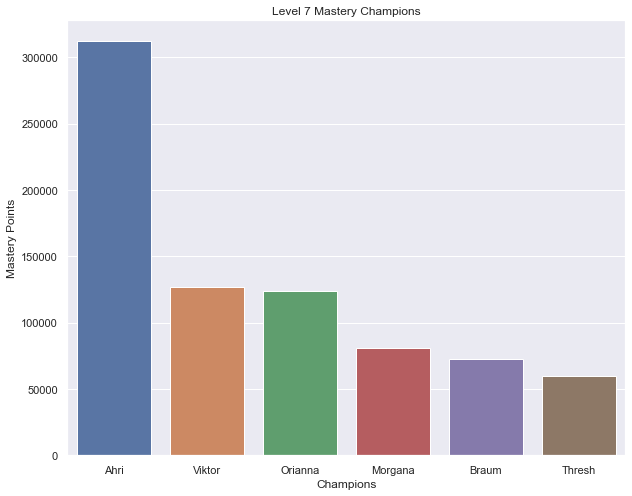

In [12]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 8))
plt.title("Level 7 Mastery Champions")
plt.xlabel("Champions")
plt.ylabel("Mastery Points")

sns.barplot(
    x=champ_names,
    y=champ_points,
)

In [39]:
# Get match history data

ranked_player = watcher.summoner.by_name(region, 'FUDGEYCAKEY')

ranked_puuid = ranked_player['puuid']

# max count=100
history = watcher.match.matchlist_by_puuid(region, puuid, queue=420, count=100)

match_id = 'NA1_4276630734'

match = watcher.match.by_id(region, match_id)

match_timeline = watcher.match.timeline_by_match(region, match_id)

print(history)

print(f"\n\n{match}")

#print(f"\n\n{match_timeline}")

['NA1_4276627830', 'NA1_4276630734', 'NA1_4271399837', 'NA1_4271341235', 'NA1_4271285171', 'NA1_4200069215', 'NA1_4200057973', 'NA1_4200023211', 'NA1_4195249549', 'NA1_4195296421', 'NA1_4192896758', 'NA1_4192828915', 'NA1_4192861697', 'NA1_4192737361', 'NA1_4191628052', 'NA1_4190571787', 'NA1_4190503402', 'NA1_4190491622', 'NA1_4183313170', 'NA1_4183208690', 'NA1_4183220508', 'NA1_4181962985', 'NA1_4181858654', 'NA1_4178015004', 'NA1_4177827642', 'NA1_4176610684', 'NA1_4176591844', 'NA1_4176486747', 'NA1_4175591432', 'NA1_4175571307', 'NA1_4174230478', 'NA1_4174137022', 'NA1_4172646223', 'NA1_4172587470', 'NA1_4171197980', 'NA1_4171203080', 'NA1_4169900567', 'NA1_4169821877', 'NA1_4169772592', 'NA1_4102698720', 'NA1_4102683102', 'NA1_4102635137', 'NA1_4100010194', 'NA1_4099965698', 'NA1_4099991612', 'NA1_4099917364', 'NA1_4099933969', 'NA1_4091819791', 'NA1_4091752285', 'NA1_4090225331', 'NA1_4090232653', 'NA1_4048993419', 'NA1_4048908141', 'NA1_4048932745', 'NA1_4048887179', 'NA1_4048